# Лабораторная работа №1
# Вариант 7 (Camera)


## ФИО студента: Скрынский Дмитрий
## Группа: 17-ВМ

### Задачи:

1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.
2. Вычислите корреляцию Пирсона и Спирмена между Price и Max (Min) Resolution. Сравните полученные величины корреляции.     Постройте гистограммы для указанных признаков.
3. Постройте график изменения средней цены на камеры по годам.
4. Определите компанию, камеры которой наиболее часто встречаются в наборе данных.
5. Добавьте в набор данных признак, являющийся произведением двух других признаков.
6. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.
7. Определите камеру с максимальной стоимостью, определите камеру с минимальной стоимостью.
8. Определите год, в который было выпущено максимально количество новых камер.

## Начало работы


In [14]:
from __future__ import(absolute_import, division, print_function, unicode_literals)

import warnings
warnings.simplefilter('ignore')
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as dp
import seaborn as sns

%matplotlib inline
camera = dp.read_csv('camera_dataset.csv')

Populating the interactive namespace from numpy and matplotlib


### 1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.

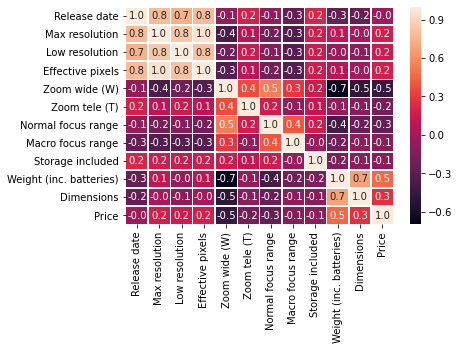

In [3]:

sns.heatmap(camera.corr(), annot = True, fmt = '.1f', linewidths = .5)

##### Вывод: 

Минимальное значение корреляции получилось между признаком 'Zoom wide (W)' с параметрами 'Price', 'Weight (inc. batteries)', 'Dimensions'

Максимальное значение корреляции  - между признаком 'Release date' с параметрами 'Release date', 'Max resolution', 'Low resolution'; признаком 'Weight (inc. batteries)' с параметром 'Dimensions'


### 2. Вычислите корреляцию Пирсона и Спирмена между Price и Max (Min) Resolution. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. 

Коэффициент корреляции Пирсона:  (0.12911915630486454, 3.0137254410634713e-05)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=0.10126852664923244, pvalue=0.0010863948570554284)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


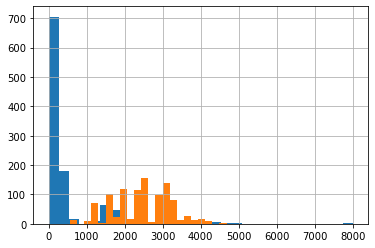

In [5]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

laber_encoder = LabelEncoder()
vehicleCoder = dp.Series(laber_encoder.fit_transform(camera['Max resolution']))
pears = pearsonr(camera['Price'], vehicleCoder)
spearm = spearmanr(camera['Price'], vehicleCoder)

print("Коэффициент корреляции Пирсона: ", pears)
print("Коэффициент корреляции Спирмена: ", spearm)

print(camera.Price.hist(bins = 30))  
print(camera['Max resolution'].hist(bins = 30))

### 3. Постройте график изменения средней цены на камеры по годам.

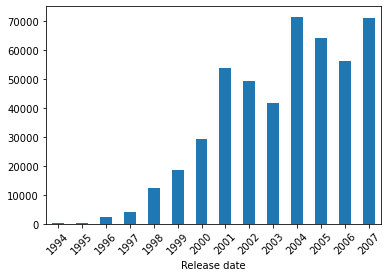

In [6]:
camera.groupby(['Release date'])['Price'].sum().plot(kind = 'bar',rot=45)

### 4. Определите компанию, камеры которой наиболее часто встречаются в наборе данных.

In [15]:
company = camera["Model"].tolist()
company = list(map(lambda company: company.split(" ")[0], company))
company
unique, pos = np.unique(company, return_inverse=True)
counts = np.bincount(pos)
maxpos = counts.argmax()

print("Компания, камеры которой наиболее часто встречаются в наборе данных: {0} - {1} записи".format(unique[maxpos], counts[maxpos]))

Компания, камеры которой наиболее часто встречаются в наборе данных: Olympus - 122 записи


### 5. Добавьте в набор данных признак, являющийся произведением двух других признаков.

In [11]:
camera['Zoom wide (W)*Zoom tele (T)'] = [n for n in (camera['Zoom wide (W)'] * camera['Zoom tele (T)'] )]
camera[['Zoom wide (W)', 'Zoom tele (T)', 'Zoom wide (W)*Zoom tele (T)']].head(10)

,Zoom wide (W),Zoom tele (T),Zoom wide (W)*Zoom tele (T)
0,38.0,114.0,4332.0
1,38.0,114.0,4332.0
2,45.0,45.0,2025.0
3,35.0,35.0,1225.0
4,43.0,43.0,1849.0
5,51.0,51.0,2601.0
6,34.0,102.0,3468.0
7,42.0,42.0,1764.0
8,50.0,50.0,2500.0
9,35.0,105.0,3675.0


### 6. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.

In [12]:
cameranew = camera
cameranew = cameranew.dropna()
print('Размер набора данных до удаления:', camera.shape,)
print('Размер набора данных после удаления:', cameranew.shape,)

Размер набора данных до удаления: (1038, 14)
Размер набора данных после удаления: (1036, 14)


### 7. Определите камеру с максимальной стоимостью, определите камеру с минимальной стоимостью.

In [13]:
min_price = camera['Price'].min()
max_price = camera['Price'].max()
print('Минимальная стоимость: ', min_price)
print('Максимальная стоимость: ', max_price)

Минимальная стоимость:  14.0
Максимальная стоимость:  7999.0


### 8. Определите год, в который было выпущено максимально количество новых камер.

In [14]:
year = camera.groupby('Release date')['Model'].count()
print(year)
model = camera['Release date'].max()
print('Максимальное количество новых камер было выпущено в: ', model, 'году')

Release date
1994      1
1995      1
1996      4
1997     11
1998     32
1999     53
2000     61
2001     85
2002     89
2003    101
2004    141
2005    143
2006    153
2007    163
Name: Model, dtype: int64
Максимальное количество новых камер было выпущено в:  2007 году
